In [1]:
from kymata.datasets.sample import KymataMirror2023Q3Dataset, TVLDeltaInsTC1LoudnessOnlySensorsDataset
from kymata.entities.expression import HexelExpressionSet, SensorExpressionSet
from kymata.plot.plotting import expression_plot

### Plot Hexel Expression Plots

In [2]:
# We'll create new expression set object and add to it

# For more explanation of saving and loading ExpressionSets, see the demo_save_load.ipynb
expression_data_kymata_mirror: HexelExpressionSet = KymataMirror2023Q3Dataset().to_expressionset()

# print the names of all available functions in the expressionSet object
print("\n".join(expression_data_kymata_mirror.functions))

Local file already exists: /Users/cai/Dox/Work/Kymata lab/Data/kymata_data/kymata_mirror_Q3_2023/kymata_mirror_Q3_2023_expression_endtable.nkg


/Users/cai/Dox/Work/Kymata lab/Code/kymata-toolbox/kymata/io/nkg.py:136: UserWarning: This file uses an old format. Please consider re-saving the data to avoid future incompatibility.
  warn("This file uses an old format. Please consider re-saving the data to avoid future incompatibility.")


vertical displacement (RH-Th/P/M)
vertical displacement (RH-Ha/P/M)
vertical displacement (LH-Th/P/M)
vertical displacement (LH-Ha/P/M)
vibration detection (RH-Th/P/M)
vibration detection (LH-Th/P/M)
vibration detection (LH-Ha/P/M)
vibration detection (RH-Ha/P/M)
CIECAM02 A
CIECAM02 a
CIELAB a*
CIELAB L
Heeger horizontal position
Heeger horizontal velocity
Heeger horizontal acceleration
Heeger horizontal ME GP1
Heeger horizontal ME GP2
Heeger horizontal ME GP3
Heeger horizontal ME GP4
Horn-Schunck Horizontal Velocity
Horn-Schunck Horizontal Displacement
Horn-Schunck Horizontal Acceleration
Hilbert envelope
TVL loudness (short-term)
TVL loudness (instantaneous)
TVL loudness chan 1 (instantaneous)
TVL loudness chan 2 (instantaneous)
TVL loudness chan 3 (instantaneous)
TVL loudness chan 4 (instantaneous)
TVL loudness chan 5 (instantaneous)
TVL loudness chan 6 (instantaneous)
TVL loudness chan 7 (instantaneous)
TVL loudness chan 8 (instantaneous)
TVL loudness chan 9 (instantaneous)
TVL lou

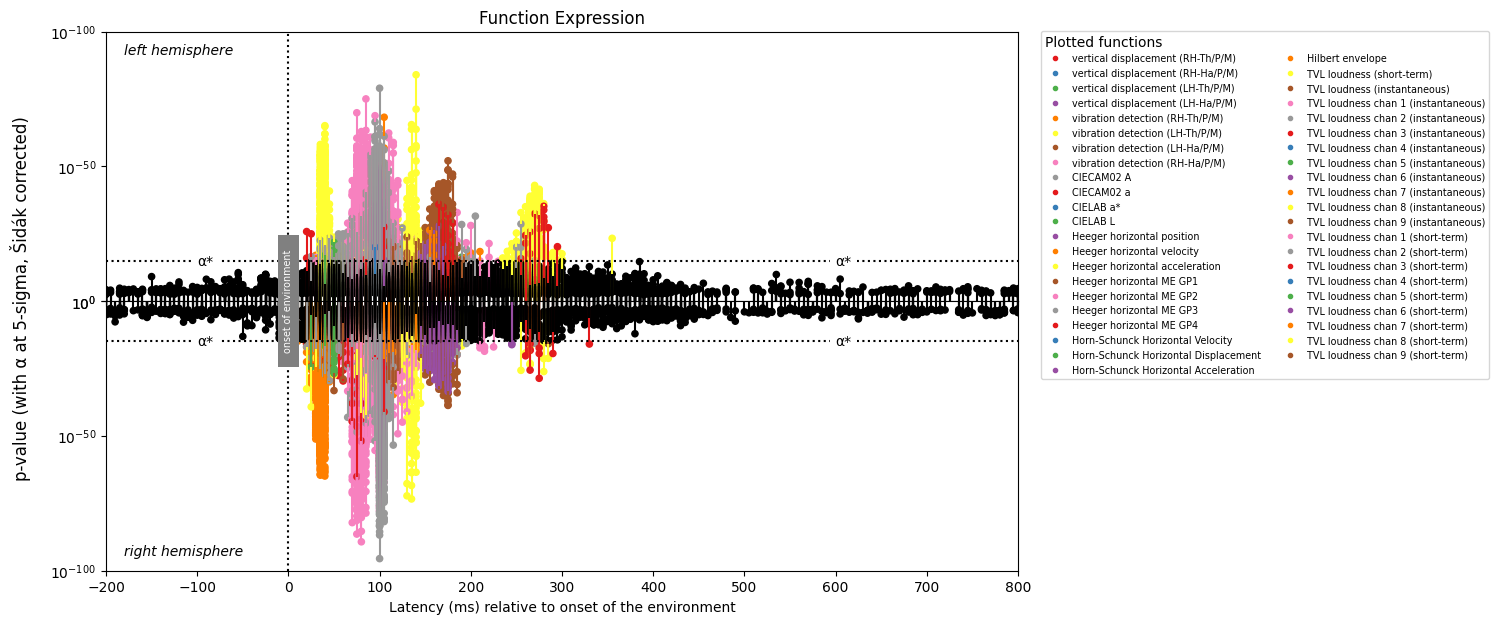

In [3]:
# plot everything, with everything model selected against each other
expression_plot(expression_data_kymata_mirror)

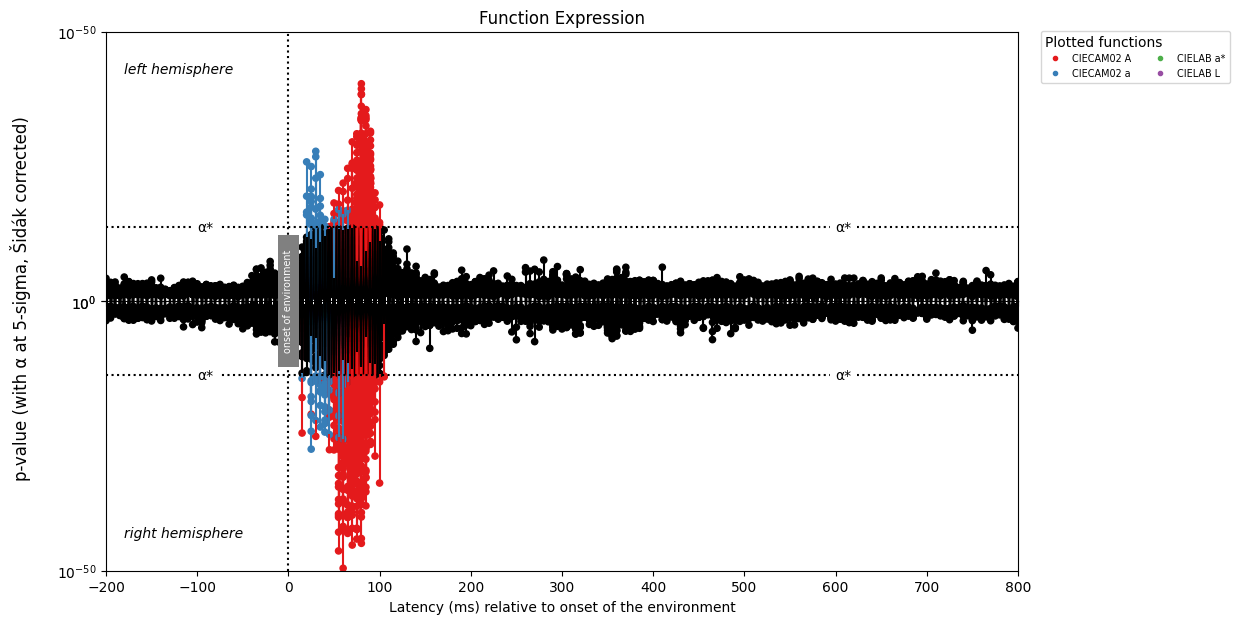

In [4]:
# only compare a subset of functions (e.g. colour functions), and print them all.
# Note that 'CIELAB a*' and 'CIELAB L' are not significant, and so will not turn up.
expression_plot(expression_data_kymata_mirror[
                    'CIECAM02 A',
                    'CIECAM02 a',
                    'CIELAB a*',
                    'CIELAB L'
                ])

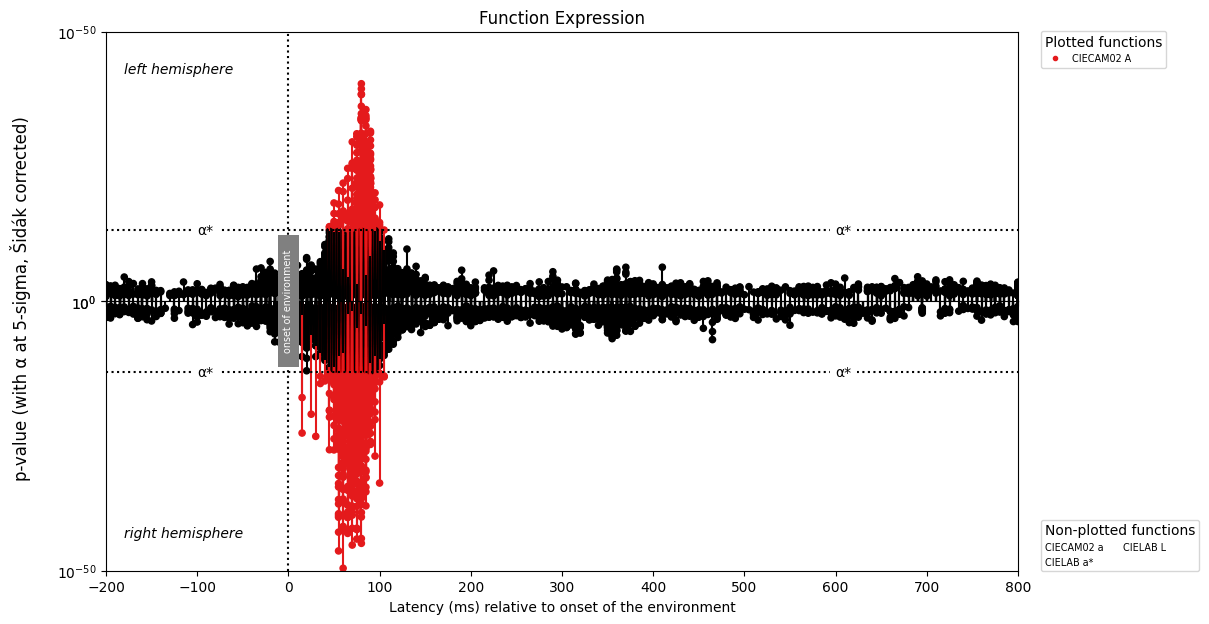

In [5]:
# Only compare a subset of functions, and print just one of them
expression_plot(expression_data_kymata_mirror[
                    'CIECAM02 A',
                    'CIECAM02 a',
                    'CIELAB a*',
                    'CIELAB L'
                ], show_only=[
                    "CIECAM02 A"
                ])

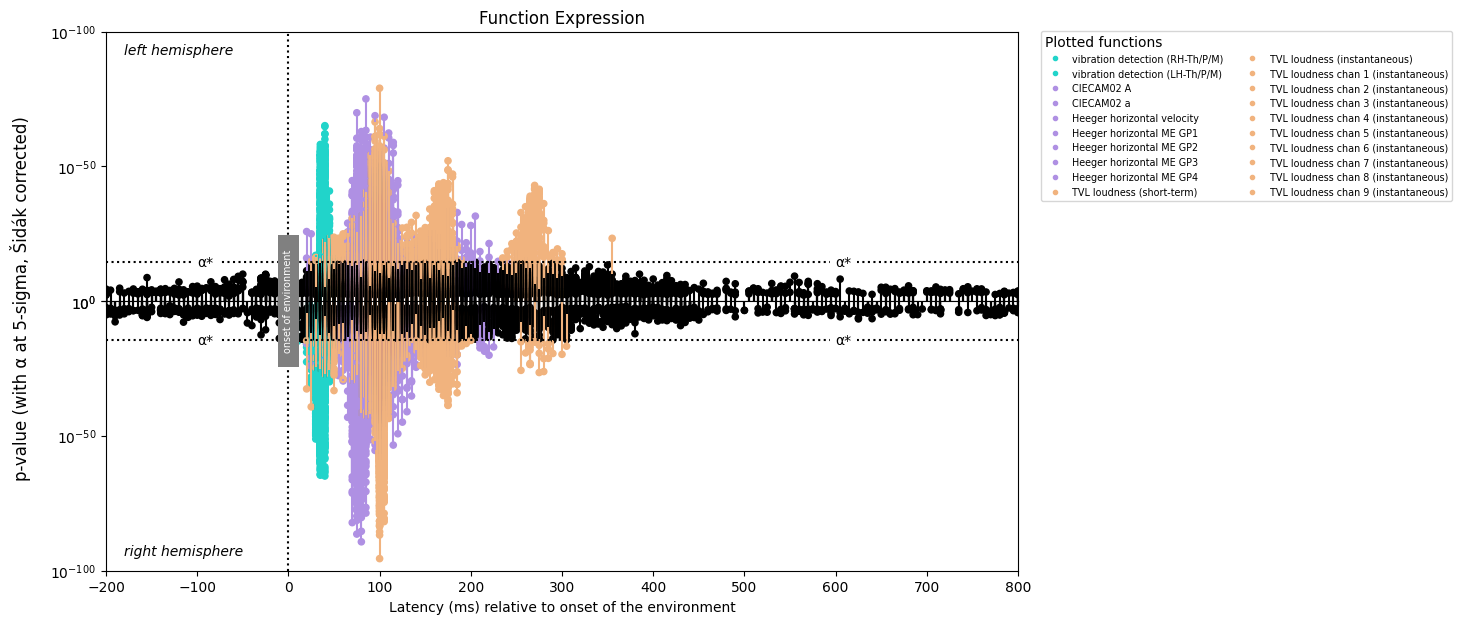

In [6]:
# Override colours (using hexcodes) so that all touch are cyan, all hearing orange, and all visual purple
expression_plot(expression_data_kymata_mirror[
                    'vibration detection (RH-Th/P/M)',
                    'vibration detection (LH-Th/P/M)',
                    'CIECAM02 A',
                    'CIECAM02 a',
                    'Heeger horizontal velocity',
                    'Heeger horizontal ME GP1',
                    'Heeger horizontal ME GP2',
                    'Heeger horizontal ME GP3',
                    'Heeger horizontal ME GP4',
                    'TVL loudness (short-term)', 
                    'TVL loudness (instantaneous)', 
                    'TVL loudness chan 1 (instantaneous)', 
                    'TVL loudness chan 2 (instantaneous)', 
                    'TVL loudness chan 3 (instantaneous)', 
                    'TVL loudness chan 4 (instantaneous)', 
                    'TVL loudness chan 5 (instantaneous)', 
                    'TVL loudness chan 6 (instantaneous)', 
                    'TVL loudness chan 7 (instantaneous)',
                    'TVL loudness chan 8 (instantaneous)',
                    'TVL loudness chan 9 (instantaneous)',
                ], color = {
                    'vibration detection (RH-Th/P/M)': '#21d4ca',
                    'vibration detection (LH-Th/P/M)': '#21d4ca',
                    'CIECAM02 A': '#af90e3',
                    'CIECAM02 a': '#af90e3',
                    'Heeger horizontal velocity': '#af90e3',
                    'Heeger horizontal ME GP1': '#af90e3',
                    'Heeger horizontal ME GP2': '#af90e3',
                    'Heeger horizontal ME GP3': '#af90e3',
                    'Heeger horizontal ME GP4': '#af90e3',
                    'TVL loudness (short-term)': '#f1b37e',
                    'TVL loudness (instantaneous)': '#f1b37e',
                    'TVL loudness chan 1 (instantaneous)': '#f1b37e',
                    'TVL loudness chan 2 (instantaneous)': '#f1b37e',
                    'TVL loudness chan 3 (instantaneous)': '#f1b37e',
                    'TVL loudness chan 4 (instantaneous)': '#f1b37e',
                    'TVL loudness chan 5 (instantaneous)': '#f1b37e',
                    'TVL loudness chan 6 (instantaneous)': '#f1b37e',
                    'TVL loudness chan 7 (instantaneous)': '#f1b37e',
                    'TVL loudness chan 8 (instantaneous)': '#f1b37e',
                    'TVL loudness chan 9 (instantaneous)': '#f1b37e'
                  })

### Plot sensor expression plots

Local file already exists: /Users/cai/Dox/Work/Kymata lab/Data/kymata_data/TVL_2020_delta_ins_tontop_chan1_loudness_only_sensors/TVL_2020_delta_ins_tontop_chan1_loudness_only_sensors.nkg


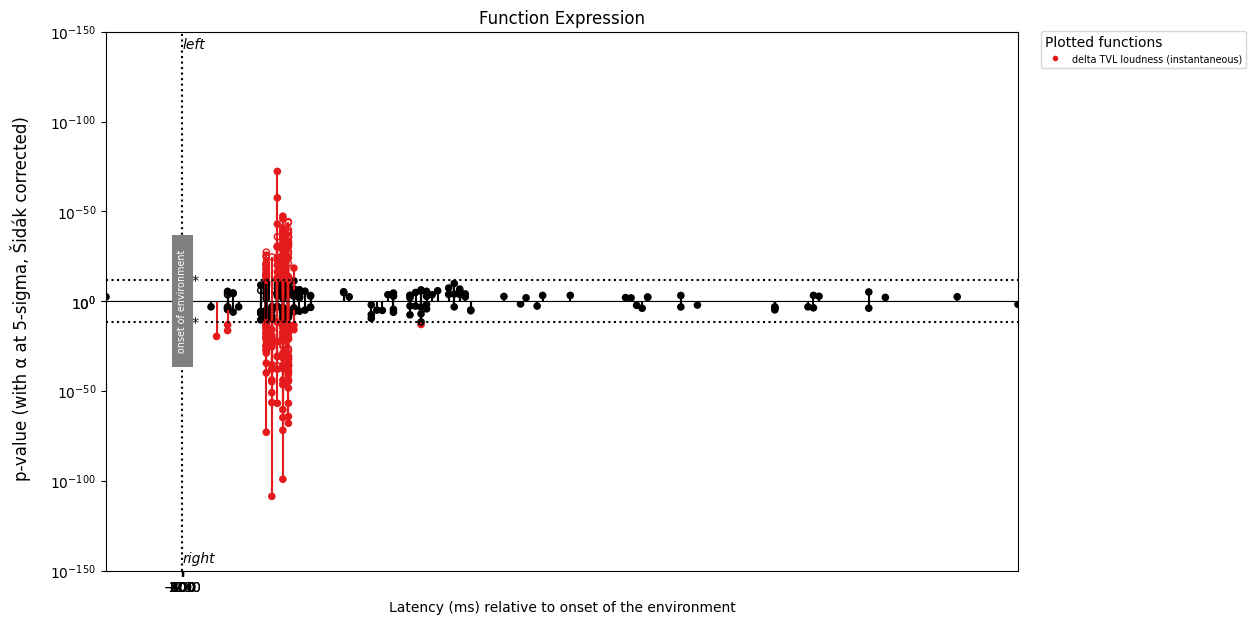

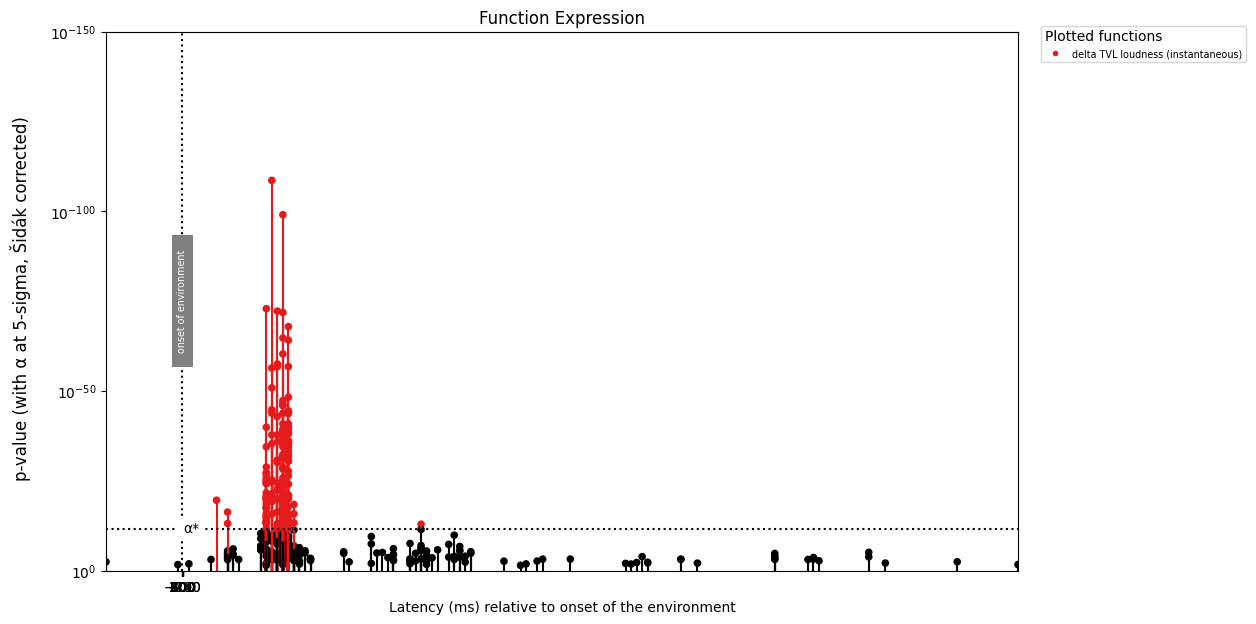

In [7]:
expression_data_TVL_ins_loudness_TC1_sensors: SensorExpressionSet = TVLDeltaInsTC1LoudnessOnlySensorsDataset().to_expressionset()
expression_plot(expression_data_TVL_ins_loudness_TC1_sensors)
# With sensor data we can also plot all sensors pointing in the same direction if we don't wish to
# distinguish between left and right sensors
expression_plot(expression_data_TVL_ins_loudness_TC1_sensors, paired_axes=False)